# alphalens
```shell
# 环境配置
pip install -U pandas==0.25.* matplotlib==3.1.*
# 作业后
pip install -U pandas matplotlib
```

In [1]:
import pandas as pd
import alphalens as al

In [2]:
!python -V

Python 3.7.7


In [3]:
pd.__version__

'0.25.3'

# 数据整理

In [4]:
h5=pd.HDFStore('data/data.h5',mode='r')
h5.keys()

['/fac',
 '/ind_close',
 '/ind_info',
 '/inx_close',
 '/obj_close',
 '/obj_cls',
 '/obj_weight']

In [5]:
h5['fac'].columns

Index(['avg_turn_20', 'avg_turn_240', 'avg_turn_60', 'beta_csi300_60_0',
       'close_0', 'date', 'fs_common_equity_0', 'fs_net_cash_flow_ttm_0',
       'fs_net_profit_yoy_0', 'fs_non_current_liabilities_0',
       'fs_operating_revenue_yoy_0', 'fs_total_equity_0',
       'fs_total_liability_0', 'instrument', 'market_cap_0',
       'market_cap_float_0', 'pb_lf_0', 'pe_ttm_0', 'return_60',
       'swing_volatility_60_0', 'volatility_60_0', 'west_eps_ftm_0'],
      dtype='object')

In [6]:
# 因子数据整理
f=(
    h5['fac'].set_index(['date','instrument'])
    .loc[:,['beta_csi300_60_0']]
    .groupby('instrument')
    .apply(lambda i:i.fillna(method='ffill'))#前向填充
    .merge(right=h5['obj_weight'].set_index(['date','instrument']),
          left_index=True,right_index=True,how='inner',sort=False)
    .iloc[:,0]    
)

In [7]:
# 价格数据整理
p=(
    h5['/obj_close'].set_index(['date','instrument'])
    .iloc[:,0]
    .unstack(1)
    .fillna(method='ffill')
)

# demo

In [8]:
fd=al.utils.get_clean_factor_and_forward_returns(
        factor=f,
        prices=p,
        quantiles=5,
        periods=(5,),
    )

Dropped 2.0% entries from factor data: 2.0% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!


Quantiles Statistics


,min,max,mean,std,count,count %
factor_quantile,,,,,,
1,-0.914283,0.867053,0.539159,0.192714,14820,20.047616
2,0.604512,1.040747,0.825851,0.074268,14774,19.985390
3,0.834286,1.165387,0.998332,0.061494,14737,19.935339
4,1.015655,1.448960,1.189348,0.079598,14774,19.985390
5,1.209988,3.034019,1.546049,0.235604,14819,20.046264


Returns Analysis


,5D
Ann. alpha,0.074
beta,0.282
Mean Period Wise Return Top Quantile (bps),22.312
Mean Period Wise Return Bottom Quantile (bps),-19.248
Mean Period Wise Spread (bps),41.560


d:\pp\miniconda3\envs\pyqi\lib\site-packages\pandas\core\arrays\datetimes.py:837: PerformanceWarning: Non-vectorized DateOffset being applied to Series or DatetimeIndex
  PerformanceWarning,
d:\pp\miniconda3\envs\pyqi\lib\site-packages\pandas\core\arrays\datetimes.py:837: PerformanceWarning: Non-vectorized DateOffset being applied to Series or DatetimeIndex
  PerformanceWarning,


<Figure size 432x288 with 0 Axes>

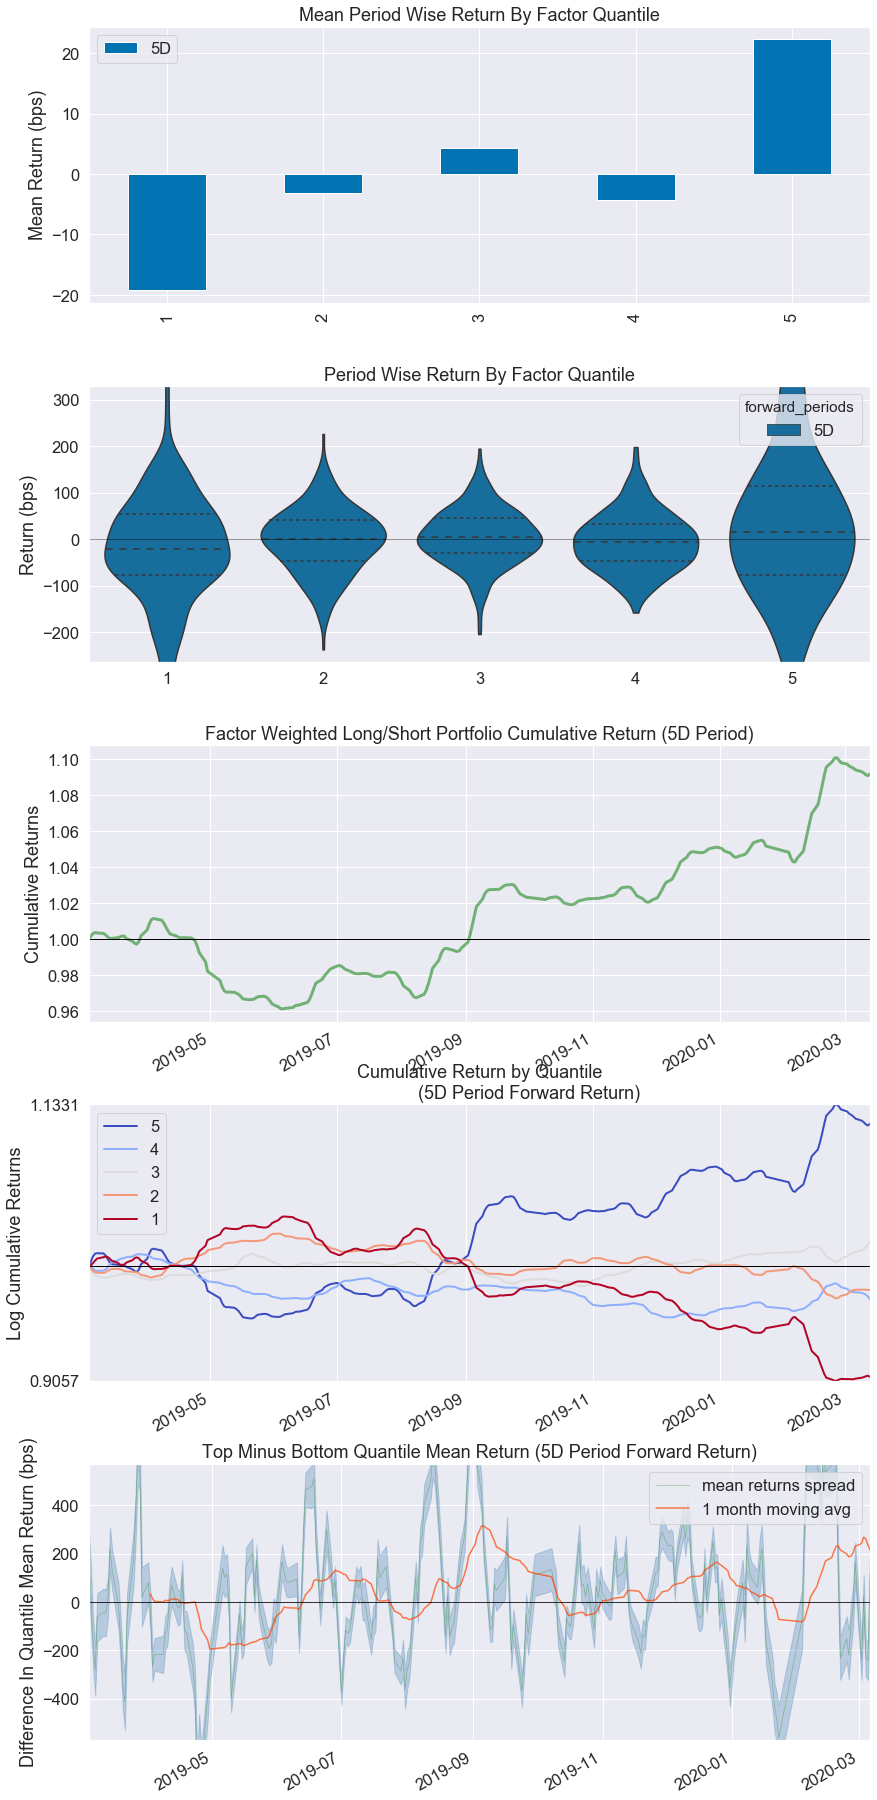

Information Analysis


,5D
IC Mean,0.019
IC Std.,0.220
Risk-Adjusted IC,0.084
t-stat(IC),1.325
p-value(IC),0.187
IC Skew,0.273
IC Kurtosis,-0.672


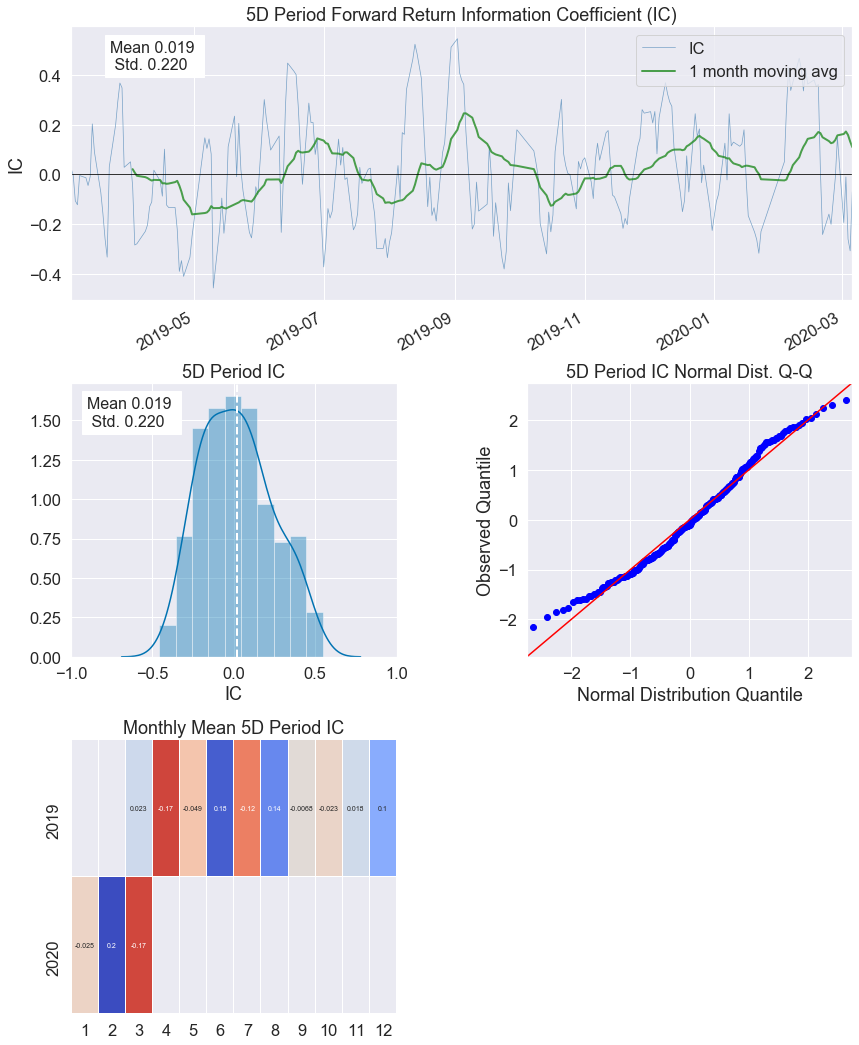

d:\pp\miniconda3\envs\pyqi\lib\site-packages\pandas\core\arrays\datetimes.py:837: PerformanceWarning: Non-vectorized DateOffset being applied to Series or DatetimeIndex
  PerformanceWarning,


Turnover Analysis


,5D
Quantile 1 Mean Turnover,0.135
Quantile 2 Mean Turnover,0.288
Quantile 3 Mean Turnover,0.324
Quantile 4 Mean Turnover,0.290
Quantile 5 Mean Turnover,0.132


,5D
Mean Factor Rank Autocorrelation,0.962


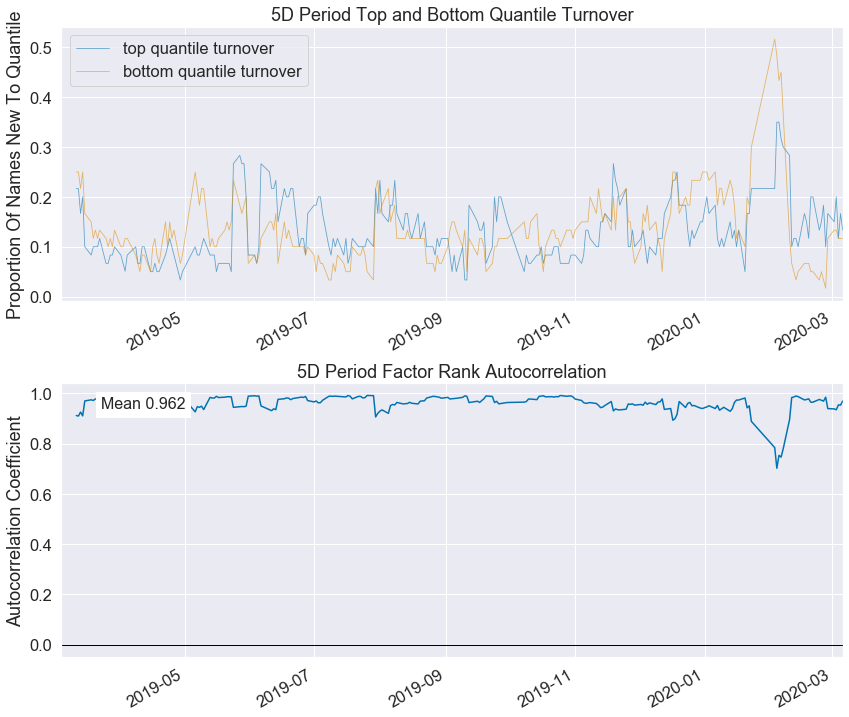

In [9]:
al.tears.create_full_tear_sheet(
    factor_data=fd,
    long_short=True,
)

# 功能

Quantiles Statistics


,min,max,mean,std,count,count %
factor_quantile,,,,,,
1,-0.914283,0.867053,0.539159,0.192714,14820,20.047616
2,0.604512,1.040747,0.825851,0.074268,14774,19.985390
3,0.834286,1.165387,0.998332,0.061494,14737,19.935339
4,1.015655,1.448960,1.189348,0.079598,14774,19.985390
5,1.209988,3.034019,1.546049,0.235604,14819,20.046264


Returns Analysis


,5D
Ann. alpha,0.074
beta,0.282
Mean Period Wise Return Top Quantile (bps),22.312
Mean Period Wise Return Bottom Quantile (bps),-19.248
Mean Period Wise Spread (bps),41.560


Information Analysis


,5D
IC Mean,0.019
IC Std.,0.220
Risk-Adjusted IC,0.084
t-stat(IC),1.325
p-value(IC),0.187
IC Skew,0.273
IC Kurtosis,-0.672


d:\pp\miniconda3\envs\pyqi\lib\site-packages\pandas\core\arrays\datetimes.py:837: PerformanceWarning: Non-vectorized DateOffset being applied to Series or DatetimeIndex
  PerformanceWarning,


Turnover Analysis


,5D
Quantile 1 Mean Turnover,0.135
Quantile 2 Mean Turnover,0.288
Quantile 3 Mean Turnover,0.324
Quantile 4 Mean Turnover,0.290
Quantile 5 Mean Turnover,0.132


,5D
Mean Factor Rank Autocorrelation,0.962


<Figure size 432x288 with 0 Axes>

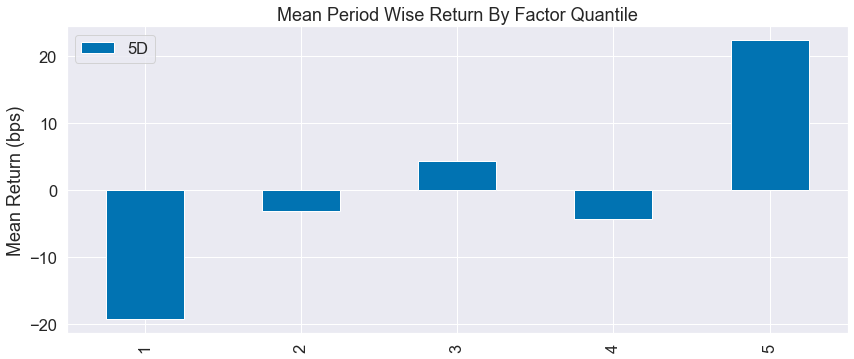

In [10]:
al.tears.create_summary_tear_sheet(factor_data=fd,long_short=True)

Quantiles Statistics


,min,max,mean,std,count,count %
factor_quantile,,,,,,
1,-0.914283,0.867053,0.539159,0.192714,14820,20.047616
2,0.604512,1.040747,0.825851,0.074268,14774,19.985390
3,0.834286,1.165387,0.998332,0.061494,14737,19.935339
4,1.015655,1.448960,1.189348,0.079598,14774,19.985390
5,1.209988,3.034019,1.546049,0.235604,14819,20.046264


Returns Analysis


,5D
Ann. alpha,0.020
beta,1.072
Mean Period Wise Return Top Quantile (bps),35.390
Mean Period Wise Return Bottom Quantile (bps),-6.170
Mean Period Wise Spread (bps),41.560


Information Analysis


,5D
IC Mean,0.019
IC Std.,0.220
Risk-Adjusted IC,0.084
t-stat(IC),1.325
p-value(IC),0.187
IC Skew,0.273
IC Kurtosis,-0.672


Turnover Analysis


,5D
Quantile 1 Mean Turnover,0.135
Quantile 2 Mean Turnover,0.288
Quantile 3 Mean Turnover,0.324
Quantile 4 Mean Turnover,0.290
Quantile 5 Mean Turnover,0.132


,5D
Mean Factor Rank Autocorrelation,0.962


<Figure size 432x288 with 0 Axes>

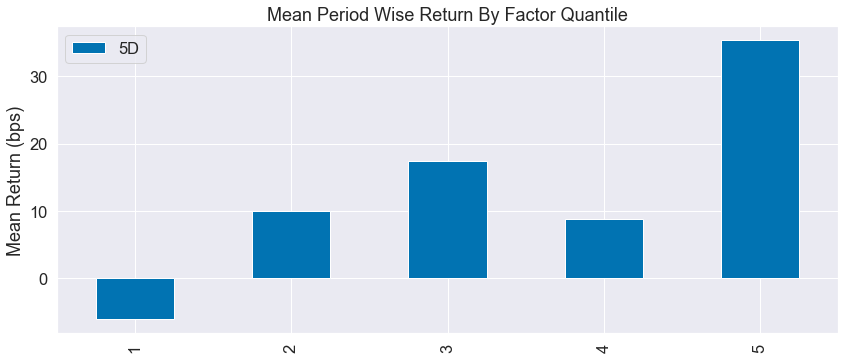

In [11]:
al.tears.create_summary_tear_sheet(factor_data=fd,long_short=False)

Returns Analysis


,5D
Ann. alpha,0.020
beta,1.072
Mean Period Wise Return Top Quantile (bps),35.390
Mean Period Wise Return Bottom Quantile (bps),-6.170
Mean Period Wise Spread (bps),41.560


d:\pp\miniconda3\envs\pyqi\lib\site-packages\pandas\core\arrays\datetimes.py:837: PerformanceWarning: Non-vectorized DateOffset being applied to Series or DatetimeIndex
  PerformanceWarning,
d:\pp\miniconda3\envs\pyqi\lib\site-packages\pandas\core\arrays\datetimes.py:837: PerformanceWarning: Non-vectorized DateOffset being applied to Series or DatetimeIndex
  PerformanceWarning,


<Figure size 432x288 with 0 Axes>

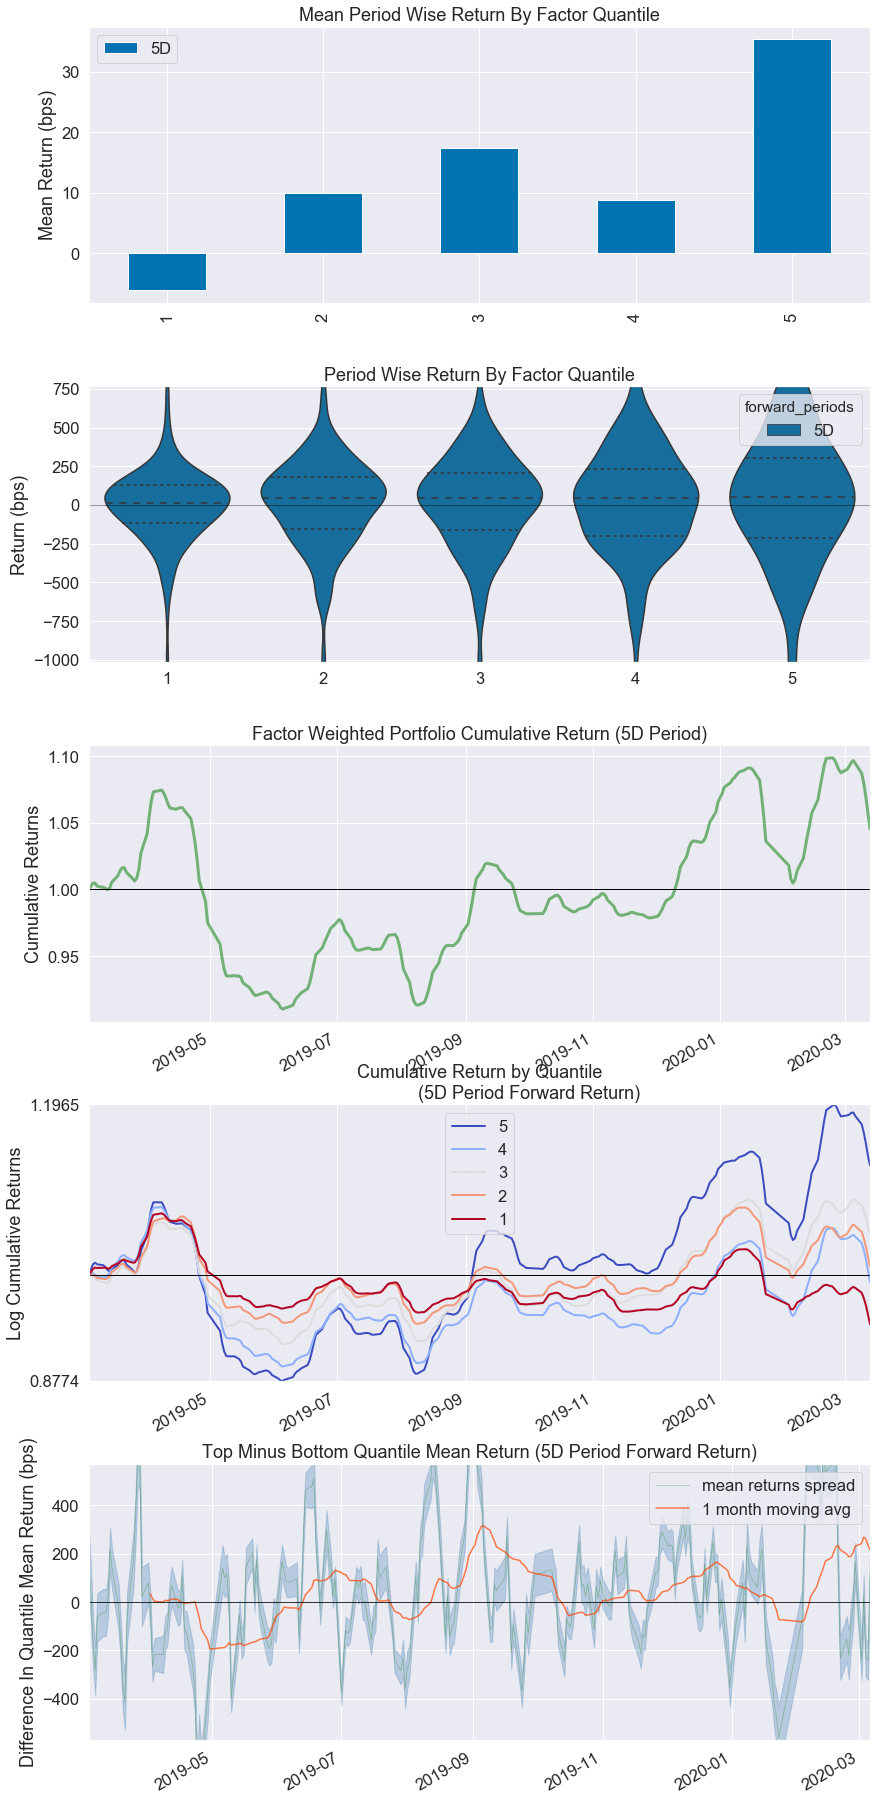

In [12]:
al.tears.create_returns_tear_sheet(factor_data=fd,long_short=False)

Information Analysis


,5D
IC Mean,0.019
IC Std.,0.220
Risk-Adjusted IC,0.084
t-stat(IC),1.325
p-value(IC),0.187
IC Skew,0.273
IC Kurtosis,-0.672


<Figure size 432x288 with 0 Axes>

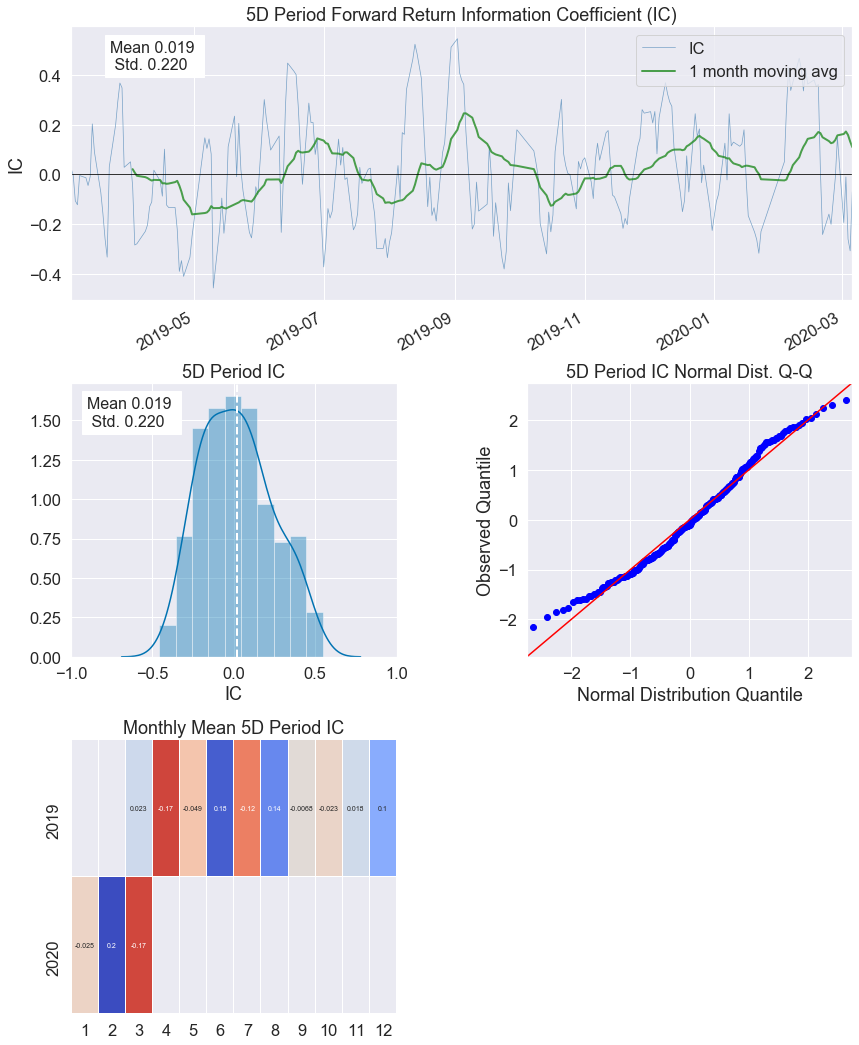

In [13]:
al.tears.create_information_tear_sheet(fd,)

d:\pp\miniconda3\envs\pyqi\lib\site-packages\pandas\core\arrays\datetimes.py:837: PerformanceWarning: Non-vectorized DateOffset being applied to Series or DatetimeIndex
  PerformanceWarning,


Turnover Analysis


,5D
Quantile 1 Mean Turnover,0.135
Quantile 2 Mean Turnover,0.288
Quantile 3 Mean Turnover,0.324
Quantile 4 Mean Turnover,0.290
Quantile 5 Mean Turnover,0.132


,5D
Mean Factor Rank Autocorrelation,0.962


<Figure size 432x288 with 0 Axes>

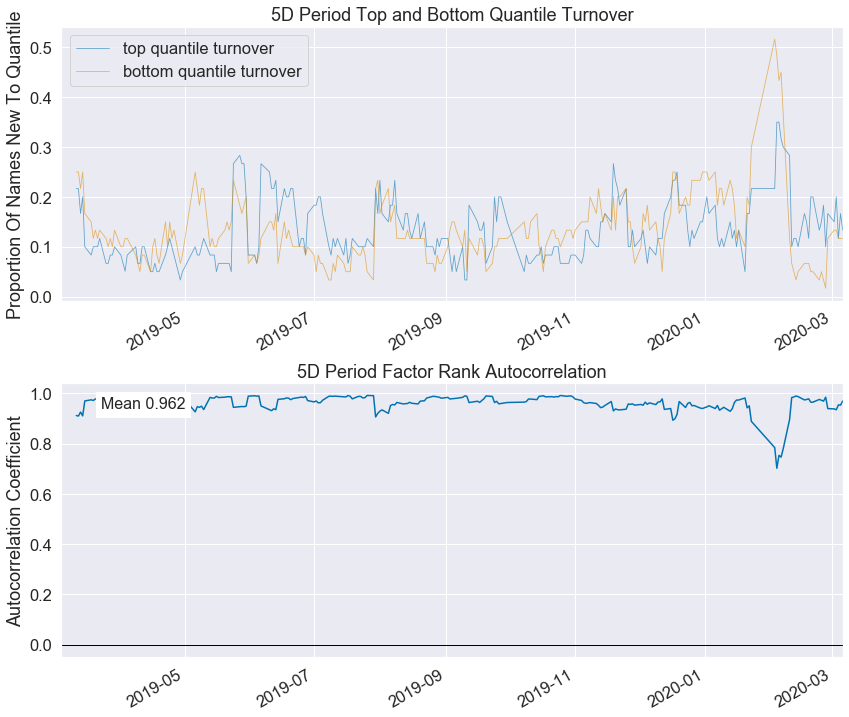

In [14]:
al.tears.create_turnover_tear_sheet(fd,)

<Figure size 432x288 with 0 Axes>

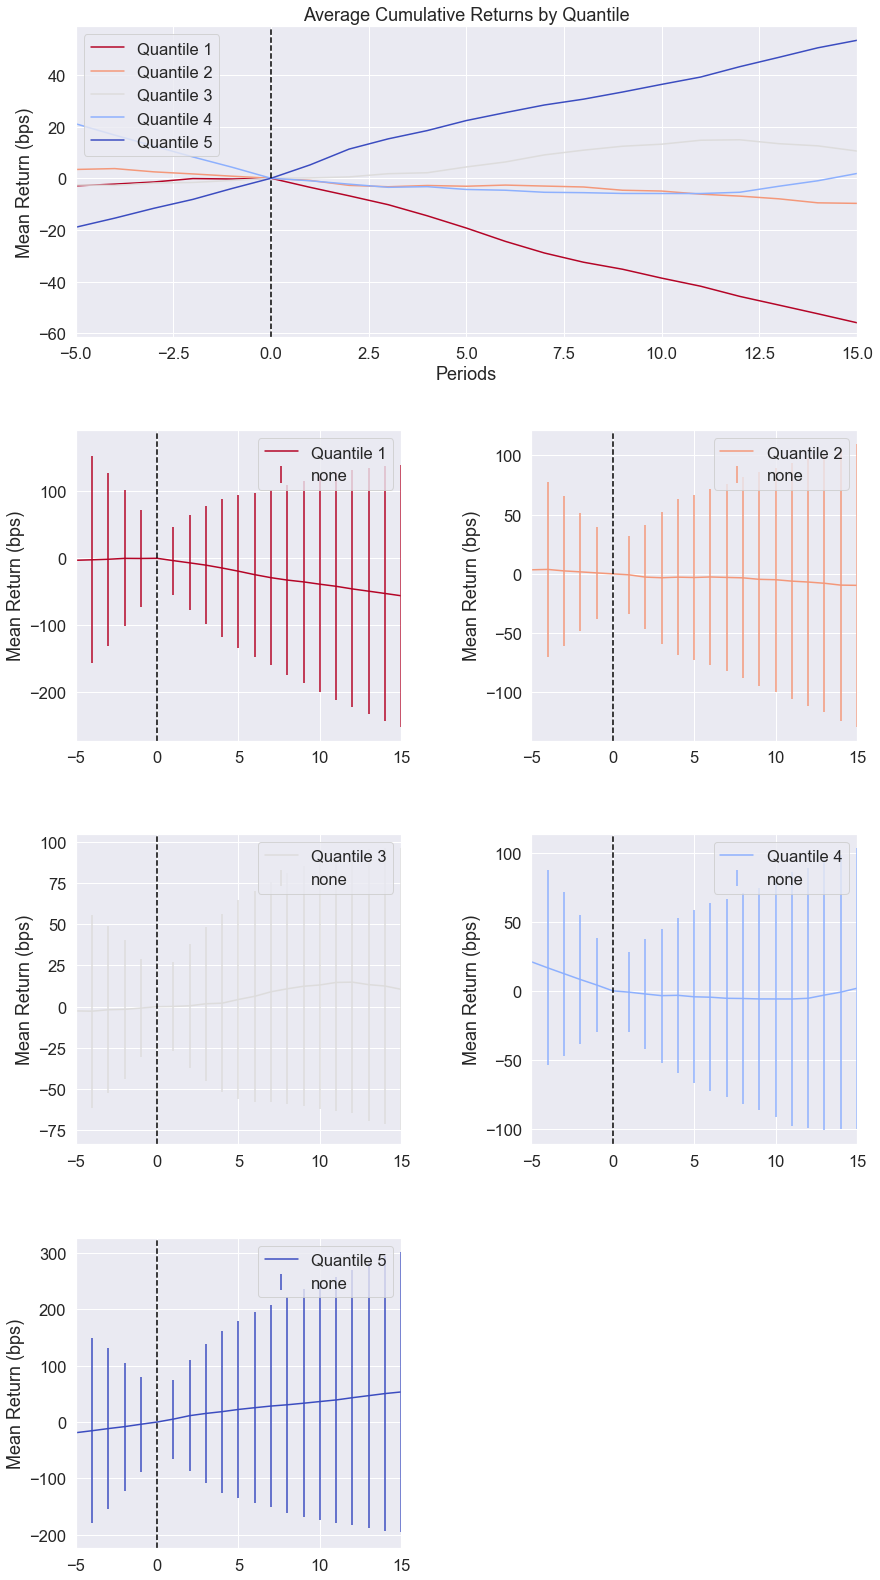

In [15]:
al.tears.create_event_returns_tear_sheet(factor_data=fd,prices=p)

Quantiles Statistics


,min,max,mean,std,count,count %
factor_quantile,,,,,,
1,-0.914283,0.867053,0.539159,0.192714,14820,20.047616
2,0.604512,1.040747,0.825851,0.074268,14774,19.985390
3,0.834286,1.165387,0.998332,0.061494,14737,19.935339
4,1.015655,1.448960,1.189348,0.079598,14774,19.985390
5,1.209988,3.034019,1.546049,0.235604,14819,20.046264


<Figure size 432x288 with 0 Axes>

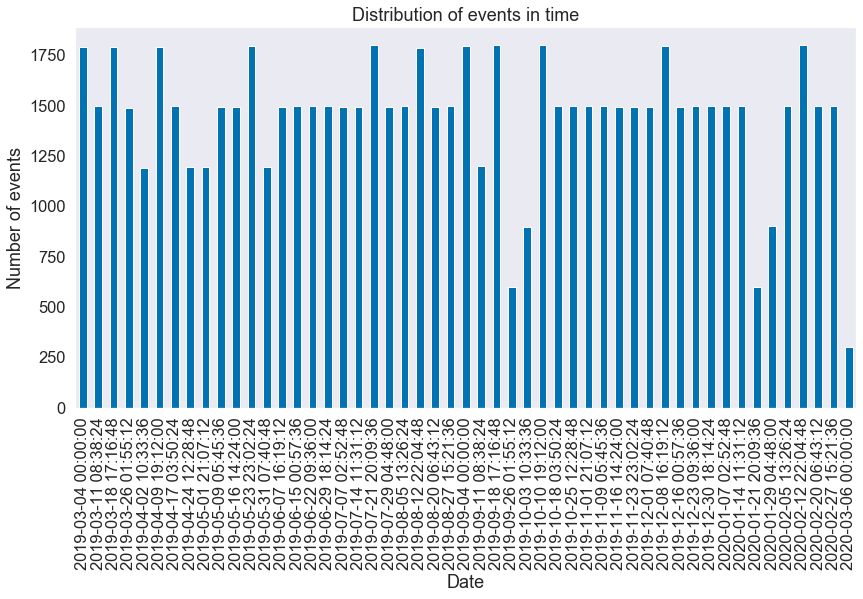

<Figure size 432x288 with 0 Axes>

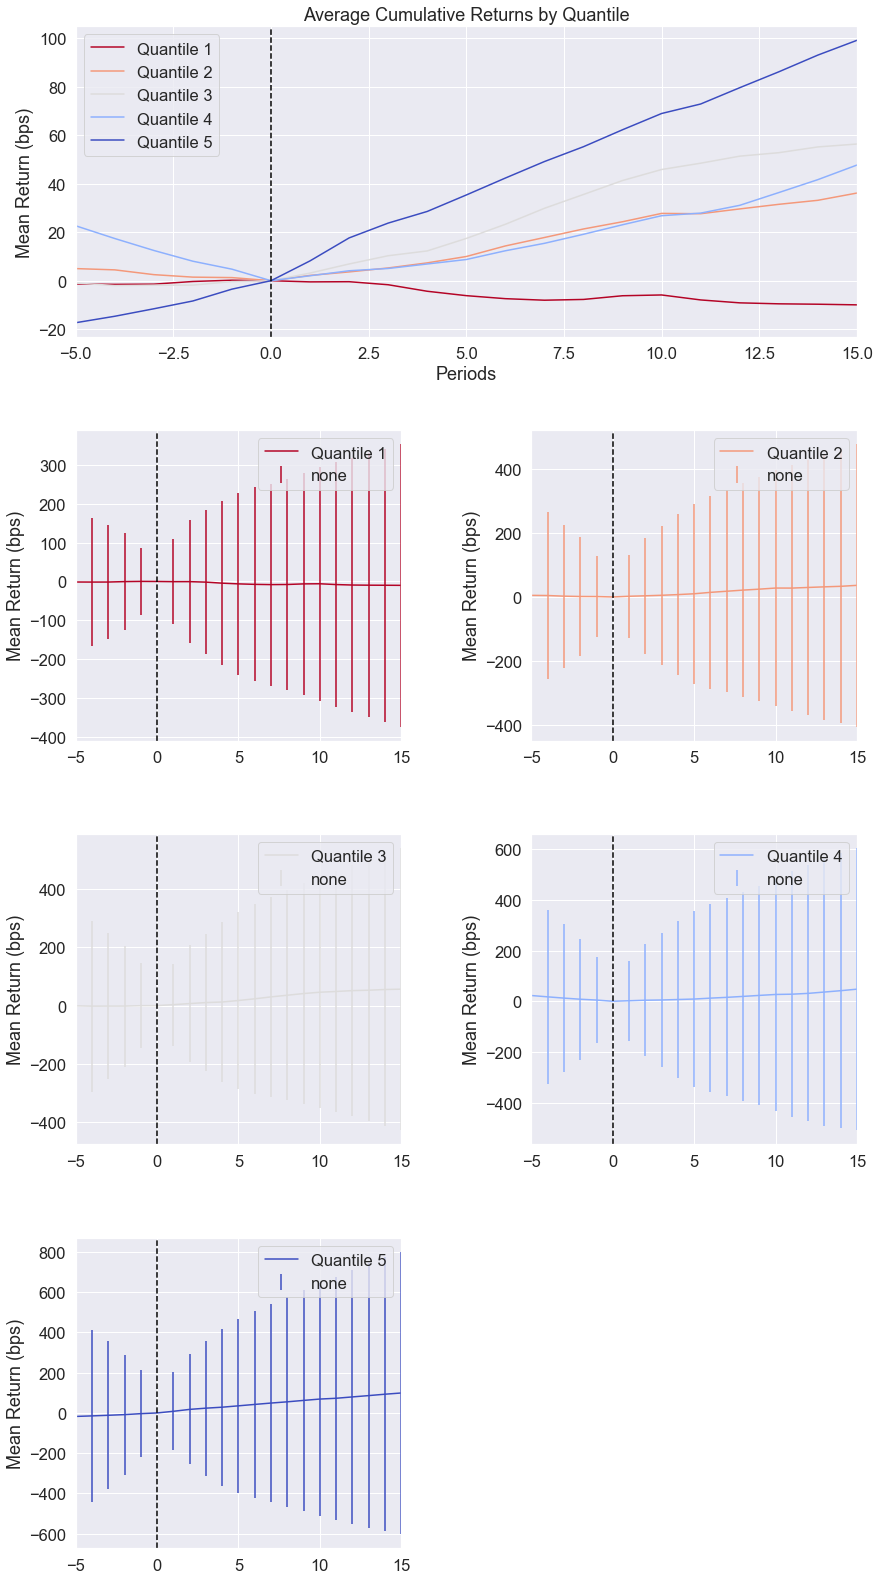

d:\pp\miniconda3\envs\pyqi\lib\site-packages\pandas\core\arrays\datetimes.py:837: PerformanceWarning: Non-vectorized DateOffset being applied to Series or DatetimeIndex
  PerformanceWarning,


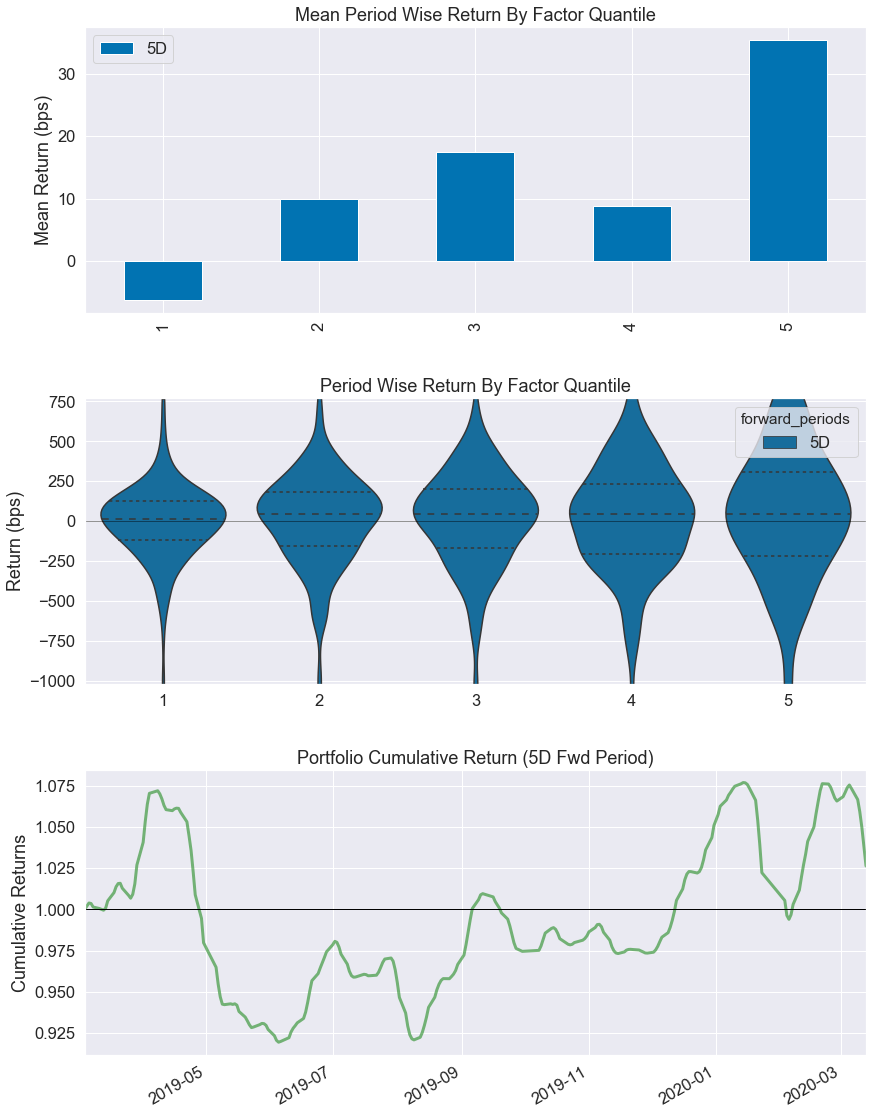

In [16]:
al.tears.create_event_study_tear_sheet(factor_data=fd,prices=p)

# 源码解析